# Reading GEDI L4A with Xarray

This notebook explores if reading GEDI L4A data with Xarray can be faster than h5py.

Install Xarray...
```
conda install -c conda-forge mambda
# Then create a new env for Xarray
mamba create -n xarrayenv -c conda-forge xarray netCDF4 h5py ipykernel geopandas
conda activate xarrayenv
python3 -m ipykernel install --user
```

In [ ]:
!unset PROJ_LIB

In [32]:
import xarray as xr
import h5py
import geopandas as gpd

In [24]:
sample = '/projects/maap-documentation-examples/gedi-subset/data/GEDI04_A_2019108045816_O01962_01_T01066_02_002_01_V002.h5'
filter_cols = ["agbd", "agbd_se", "l4_quality_flag", "sensitivity", "lat_lowestmode", "lon_lowestmode"]

In [6]:
h5 = h5py.File(sample, 'r')

In [39]:
h5.keys()
h5['BEAM0000'].keys()

<KeysViewHDF5 ['agbd', 'agbd_pi_lower', 'agbd_pi_upper', 'agbd_prediction', 'agbd_se', 'agbd_t', 'agbd_t_se', 'algorithm_run_flag', 'beam', 'channel', 'degrade_flag', 'delta_time', 'elev_lowestmode', 'geolocation', 'l2_quality_flag', 'l4_quality_flag', 'land_cover_data', 'lat_lowestmode', 'lon_lowestmode', 'master_frac', 'master_int', 'predict_stratum', 'predictor_limit_flag', 'response_limit_flag', 'selected_algorithm', 'selected_mode', 'selected_mode_flag', 'sensitivity', 'shot_number', 'solar_elevation', 'surface_flag', 'xvar']>

In [10]:
x5 = xr.open_dataset(sample, group = 'BEAM0000' )
x5

<xarray.Dataset>
Dimensions:               (phony_dim_4: 63659, phony_dim_5: 4)
Coordinates:
    delta_time            (phony_dim_4) float64 ...
    lat_lowestmode        (phony_dim_4) float64 ...
    lon_lowestmode        (phony_dim_4) float64 ...
Dimensions without coordinates: phony_dim_4, phony_dim_5
Data variables: (12/26)
    agbd                  (phony_dim_4) float32 ...
    agbd_pi_lower         (phony_dim_4) float32 ...
    agbd_pi_upper         (phony_dim_4) float32 ...
    agbd_se               (phony_dim_4) float32 ...
    agbd_t                (phony_dim_4) float32 ...
    agbd_t_se             (phony_dim_4) float32 ...
    ...                    ...
    selected_mode_flag    (phony_dim_4) uint8 ...
    sensitivity           (phony_dim_4) float32 ...
    shot_number           (phony_dim_4) uint64 ...
    solar_elevation       (phony_dim_4) float32 ...
    surface_flag          (phony_dim_4) uint8 ...
    xvar                  (phony_dim_4, phony_dim_5) float32 ...
Attributes:
    description:  Coverage beam

In [29]:
%time
df = x5.drop([item for item in list(x5.data_vars) if item not in filter_cols]).to_dataframe().reset_index()

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs


In [33]:
gdf = gpd.GeoDataFrame(df.loc[:,~df.columns.isin(['lon_lowestmode', 'lat_lowestmode', 'delta_time', 'phony_dim_4'])], 
                       geometry=gpd.points_from_xy(df.lon_lowestmode, df.lat_lowestmode))

<AxesSubplot:>

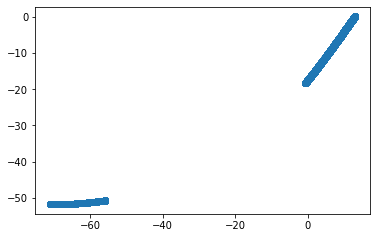

In [35]:
gdf.plot()